In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [10]:
file_path = 'formatted_sp500_clean (1).csv'
df = pd.read_csv(file_path)

In [11]:
df.head()

,DATE,SP500
0,2022-01-03,4796.56
1,2022-01-04,4793.54
2,2022-01-05,4700.58
3,2022-01-06,4696.05
4,2022-01-07,4677.03


In [12]:
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.sort_values('DATE')
    df.set_index('DATE', inplace=True)
    return df


In [13]:
def scale_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df)
    return scaled_data, scaler

In [14]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

In [15]:
filepath = 'formatted_sp500_clean (1).csv'
seq_length = 60

In [17]:
df = load_and_prepare_data(filepath)
scaled_data, scaler = scale_data(df)

In [18]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [19]:
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [20]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

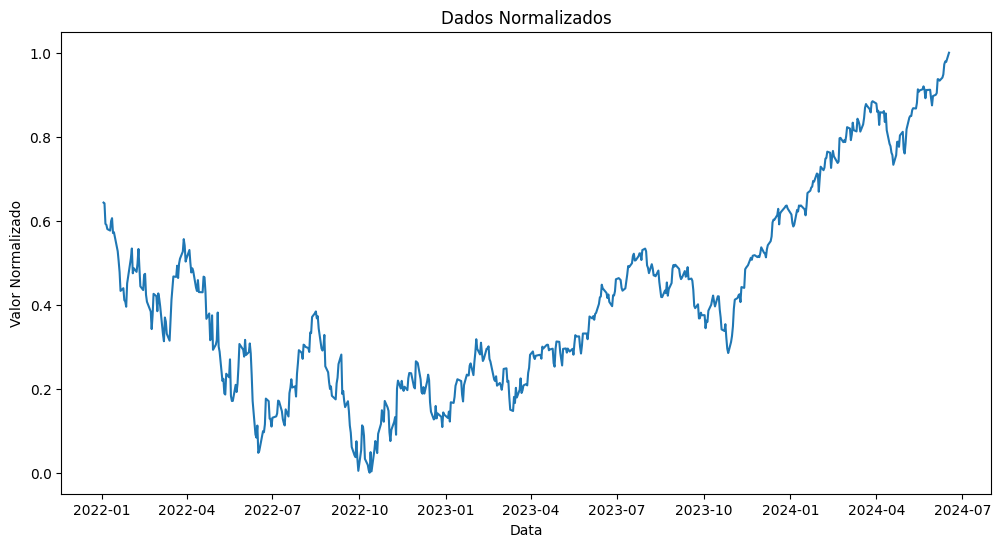

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, scaled_data)
plt.title('Dados Normalizados')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')
plt.show()